<h3> This notebook provides inforamtion how to use algotrithm and envoronment of 2-wheeled robot model

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import robotq.implementation
reload(robotq.implementation)
from robotq.implementation import SoftmaxPolicy, Qlearning, UCBPolicy
from robotq.environment import OurAwesomeEnv
from robotq.utils import evaluate_agent, record_video


<h5> Initialize our environment

In [31]:
env = OurAwesomeEnv(start=(4, 7, 1), goal=(10, 14, 2), seed=1)

<h5> Let's plot collsion maps (they are binary, (1 - cell is occupied, 0 - cell is empty))

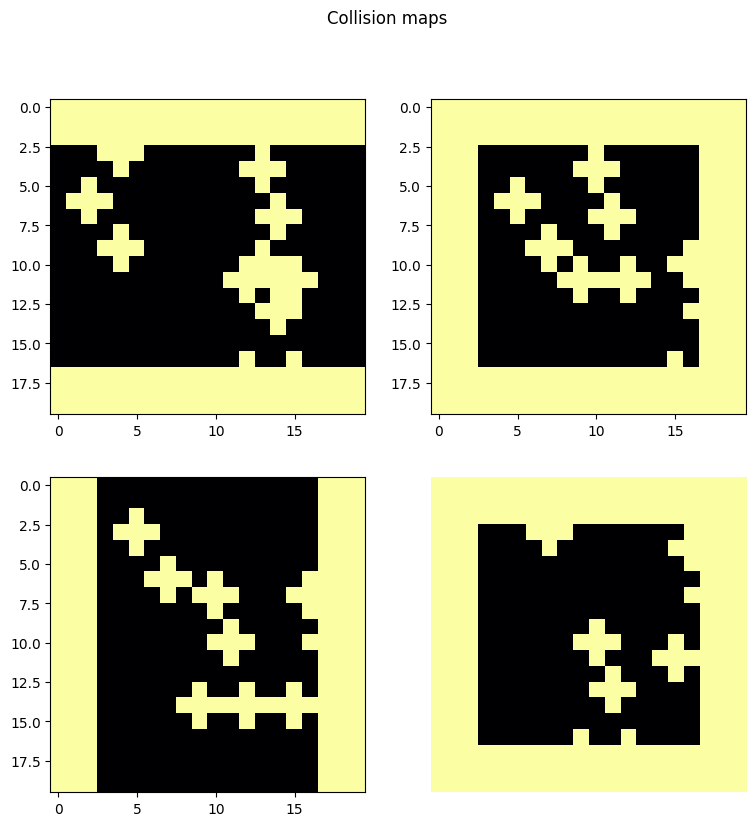

In [32]:
cmap = np.copy(env.collission_map)

fig, ax = plt.subplots(2, 2, figsize=(9, 9))
fig.suptitle('Collision maps')
plt.axis('off')

cmap_c = 'inferno'
ax[0, 0].imshow(cmap[0], cmap=cmap_c)
ax[0, 1].imshow(cmap[1], cmap=cmap_c)
ax[1, 0].imshow(cmap[2], cmap=cmap_c)
ax[1, 1].imshow(cmap[3], cmap=cmap_c)


<h5> Plotting inital state

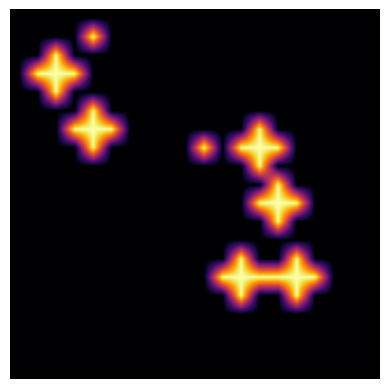

In [33]:
plt.axis('off')

env.state = env.init_state
plt.imshow(env.render(), cmap='inferno')

<h5> Plotting goal state

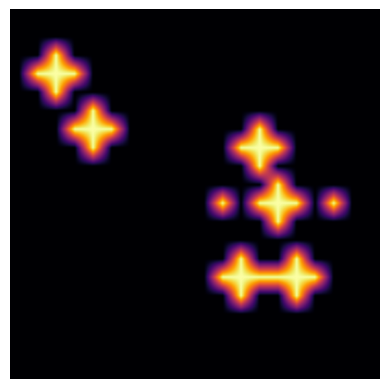

In [34]:
plt.axis('off')

env.state = (10, 14, 2)
plt.imshow(env.render(), cmap='inferno')

<h5> Training parameters

In [35]:
# Training parameters
n_training_episodes = 300000  # Total training episodes
learning_rate = 0.7          # Learning rate

# Evaluation parameters
n_eval_episodes = 1000       # Total number of test episodes

# Environment parameters
env_id = "FrozenLake-v1"     # Name of the environment
max_steps = 99               # Max steps per episode
gamma = 0.99                 # Discounting rate
eval_seed = []               # The evaluation seed of the environment

<h5> train agent

In [ ]:
policy = UCBPolicy()
qlearning = Qlearning(env, policy)
# qlearning = Qlearning(env, policy, log=True) # to profile via W&B 
Q_table = qlearning.train(n_training_episodes, max_steps, learning_rate, gamma)

  0%|          | 0/300000 [00:00<?, ?it/s]

In [ ]:
# Evaluate our Agent
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Q_table, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

<h5> time of training affects on quality

In [30]:
lst_n_training_episodes = [1000, 10000, 100000, 200000, 300000, 400000]
stats_mean_reward = []

for n_training in lst_n_training_episodes:
    qlearning = Qlearning(env, policy)
    Q_table = qlearning.train(n_training, max_steps, learning_rate, gamma)

    mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Q_table, eval_seed)
    print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")
    stats_mean_reward.append(mean_reward)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=-1.00 +/- 0.00


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=-0.96 +/- 0.26


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=-0.28 +/- 0.96


  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=0.20 +/- 0.98


  0%|          | 0/300000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=0.23 +/- 0.97


  0%|          | 0/400000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean_reward=-0.01 +/- 1.00


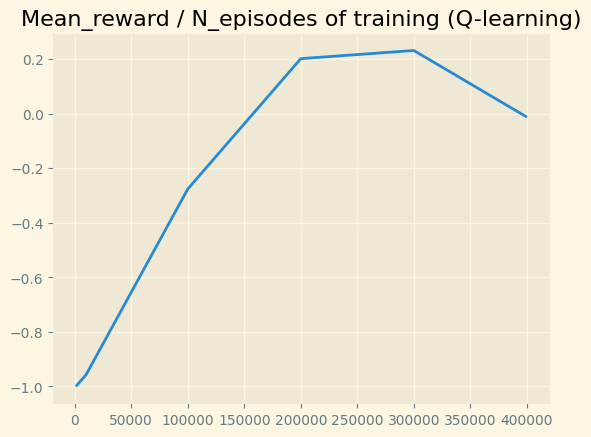

In [32]:
# importing the style package 
from matplotlib import style 
  
# using the style for the plot 
plt.style.use('Solarize_Light2') 

plt.title(f'Mean_reward / N_episodes of training (Q-learning)')

plt.plot(lst_n_training_episodes, stats_mean_reward)

<h3> (Optionaly) We can record demonstraing video

In [13]:
record_video(env, Q_table, 'Q-learning_demo.mp4', fps=3)